In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from upsetplot import UpSet

In [21]:
df0 = pd.read_csv('c0_label_positions_AD_ICD10.csv')
df1 = pd.read_csv('c1_label_positions_AD_ICD10.csv')
df2 = pd.read_csv('c2_label_positions_AD_ICD10.csv')
df3 = pd.read_csv('c3_label_positions_AD_ICD10.csv')
df4 = pd.read_csv('c4_label_positions_AD_ICD10.csv')

In [22]:
df0

,Label,X,Y,flag,mapping
0,I10,-3.501890,311.141798,0,Essential (primary) hypertension
1,F02.80,-0.580468,17.283751,1,Dementia in other diseases classified elsewhere
2,F03.90,-2.259136,241.876775,0,Unspecified dementia
3,R41.3,-1.255849,67.037987,0,NaN
4,E78.5,-2.636000,300.520953,0,Disorders of lipoprotein metabolism and other ...
...,...,...,...,...,...
1733,S50.10XA,-8.153941,5.426771,0,NaN
1734,L02.11,-8.153941,5.426771,0,NaN
1735,M25.879,-8.153941,5.426771,0,NaN
1736,K81.2,-8.153941,5.426771,0,NaN


In [23]:
df0['Cluster']=0
df1['Cluster']=1
df2['Cluster']=2
df3['Cluster']=3
df4['Cluster']=4


In [24]:
data = pd.concat([df0, df1, df2, df3, df4], axis=0)

In [25]:
data = data[data['X']>0]

In [26]:
data.sort_values('X', ascending=False)

,Label,X,Y,flag,mapping,Cluster
1882,Z48.22,7.830766,7.045224,0,NaN,1
1902,S22.43XD,7.830766,5.633614,0,NaN,1
1910,M10.071,7.830766,5.633614,1,Gout,1
1909,G57.92,7.830766,5.633614,0,NaN,1
1908,G57.91,7.830766,5.633614,0,NaN,1
...,...,...,...,...,...,...
26,R41.82,0.569639,7.749483,0,NaN,4
43,R07.89,0.549509,5.866107,0,NaN,4
37,R06.02,0.543877,5.999222,0,NaN,4
32,E03.9,0.514362,6.018501,0,Other hypothyroidism,4


In [27]:
data = data[data['X']>0]

In [28]:
data = data[['Label','Cluster','mapping']]

In [29]:
data

,Label,Cluster,mapping
35,Z00.6,0,NaN
1207,G31.01,0,Frontotemporal dementia
0,I10,1,Essential (primary) hypertension
1,Z00.00,1,NaN
2,Z23,1,NaN
...,...,...,...
192,E55,4,NaN
193,E11.01,4,Type 2 diabetes mellitus
198,D65,4,NaN
201,S52.123A,4,NaN


In [30]:
#data = data[data['Label'].str.len() < 4]

In [31]:
# クラスターごとのバイナリ行列を作成
data['value'] = 1
pivot_df = data.pivot_table(index='Cluster', columns='Label', values='value', fill_value=0)

In [32]:
pivot_df.index = ["Cluster " + str(i)  for i in pivot_df.index]

In [33]:
pivot_df

Label,A04.7,A04.72,A04.8,A08.4,A08.8,A09,A15.0,A15.9,A41.50,A41.51,...,Z98.42,Z98.49,Z98.61,Z98.89,Z98.890,Z99.11,Z99.2,Z99.3,Z99.81,Z99.89
Cluster 0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cluster 1,0,0,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Cluster 2,0,1,1,0,1,0,1,0,0,0,...,0,1,1,0,0,0,0,0,1,0
Cluster 3,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,1,1,0,1,1,0
Cluster 4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
from upsetplot import UpSet, from_contents

In [35]:
# Enrichment criteria: adjusted p-value < 0.05

<Figure size 1000x600 with 0 Axes>

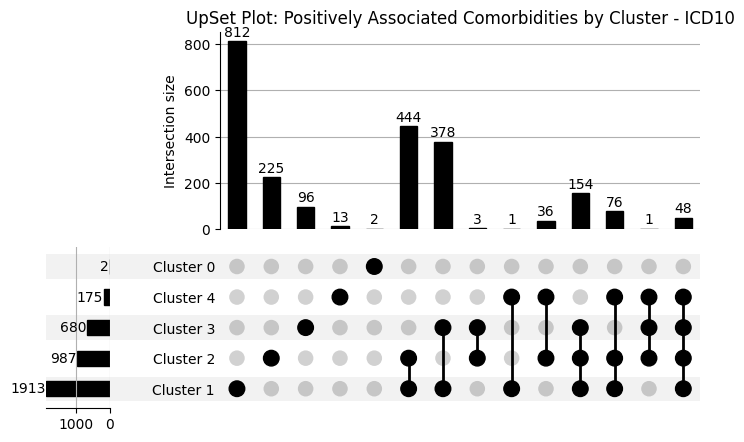

In [36]:
# クラスターごとのTrue/Falseのマッピングを生成
contents = {}
for label, row in pivot_df.iterrows():
    clusters = row[row == 1].index.tolist()  # クラスター番号のリストを取得
    contents[label] = clusters

# UpSetプロットのデータを生成
upset_data = from_contents(contents)

plt.figure(figsize=(10, 6))  # 画像のサイズを小さく設定

# UpSetプロットを描画
upset = UpSet(upset_data, subset_size='count', show_counts=True)
upset.plot()
plt.title('UpSet Plot: Positively Associated Comorbidities by Cluster - ICD10')
plt.show()

In [37]:
# upset_dataからPandas DataFrameを作成する
upset_df = upset_data.reset_index()

# カラムの名前を適切に変更（例: 'index' と 'value'）
upset_df.columns = ['c0','c1','c2','c3','c4', 'ICD']

In [38]:
upset_df.to_csv('upset_df_AD_diagnosis_ICDfull_positive.csv')

In [39]:
filtered_df = upset_df[(upset_df['c4'] == True) & 
                       (upset_df['c1'] == False) & 
                       (upset_df['c3'] == False) & 
                       (upset_df['c0'] == False) & 
                       (upset_df['c2'] == False)]

In [40]:
filtered_df

,c0,c1,c2,c3,c4,ICD
2276,False,False,False,False,True,D65
2277,False,False,False,False,True,E11.01
2278,False,False,False,False,True,F23
2279,False,False,False,False,True,G21.9
2280,False,False,False,False,True,J16.8
2281,False,False,False,False,True,K56.49
2282,False,False,False,False,True,L21.8
2283,False,False,False,False,True,L89.309
2284,False,False,False,False,True,M40.29
2285,False,False,False,False,True,N81.1


In [41]:
#filtered_df[filtered_df['ICD'].str.contains('G')]

In [42]:
filtered_df = upset_df[(upset_df['c0'] == True) & 
                       (upset_df['c2'] == False) & 
                       (upset_df['c1'] == False) & 
                       (upset_df['c4'] == False) & 
                       (upset_df['c3'] == False)]

In [43]:
filtered_df

,c0,c1,c2,c3,c4,ICD
0,True,False,False,False,False,G31.01
1,True,False,False,False,False,Z00.6


In [44]:
filtered_df = upset_df[(upset_df['c1'] == True) & 
                       (upset_df['c3'] == True) & 
                       (upset_df['c2'] == True) & 
                       (upset_df['c4'] == True) & 
                       (upset_df['c0'] == False)]

In [45]:
filtered_df

,c0,c1,c2,c3,c4,ICD
95,False,True,True,True,True,D50.9
103,False,True,True,True,True,D64.9
127,False,True,True,True,True,E03.9
162,False,True,True,True,True,E11.9
178,False,True,True,True,True,E53.8
211,False,True,True,True,True,E86.0
214,False,True,True,True,True,E87.1
232,False,True,True,True,True,F03.90
234,False,True,True,True,True,F05
241,False,True,True,True,True,F32.9


In [46]:
data = data[data['Label'].str.len() < 4]

In [47]:
# クラスターごとのバイナリ行列を作成
data['value'] = 1
pivot_df = data.pivot_table(index='Cluster', columns='Label', values='value', fill_value=0)

/usr/local/icsoftware/anaconda3/envs/jupyterhub_base_v1.5/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [48]:
pivot_df

Label,A09,B86,C19,C61,D62,D65,D66,E03,E43,E46,...,R55,R58,R61,R64,R69,Y95,Z08,Z09,Z23,Z66
Cluster,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,1,0,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
2,0,1,1,1,1,0,0,1,0,1,...,1,1,1,1,0,0,0,1,1,1
3,0,0,0,0,1,0,0,0,1,1,...,1,0,0,1,1,1,0,1,1,1
4,0,0,1,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,1


# Using a part of ICD

In [49]:
from upsetplot import UpSet, from_contents

<Figure size 1000x600 with 0 Axes>

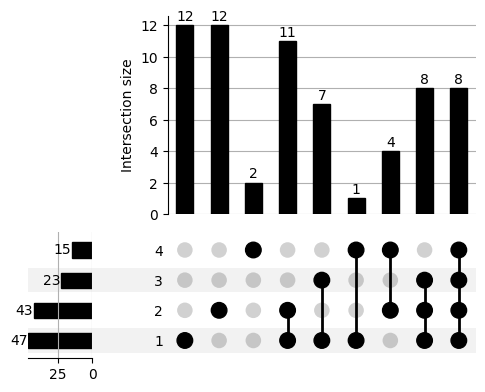

In [50]:
# クラスターごとのTrue/Falseのマッピングを生成
contents = {}
for label, row in pivot_df.iterrows():
    clusters = row[row == 1].index.tolist()  # クラスター番号のリストを取得
    contents[label] = clusters

# UpSetプロットのデータを生成
upset_data = from_contents(contents)

plt.figure(figsize=(10, 6))  # 画像のサイズを小さく設定

# UpSetプロットを描画
upset = UpSet(upset_data, subset_size='count', show_counts=True)
upset.plot()

plt.show()

In [51]:
# upset_dataからPandas DataFrameを作成する
upset_df = upset_data.reset_index()

# カラムの名前を適切に変更（例: 'index' と 'value'）
upset_df.columns = ['c1','c2','c3','c4', 'ICD']

In [52]:
upset_df.to_csv('upset_df_AD_diagnosis_ICDpart.csv')

In [53]:
filtered_df = upset_df[(upset_df['c2'] == True) & 
                       (upset_df['c1'] == True) & 
                       (upset_df['c3'] == True) & 
                       (upset_df['c4'] == False) ]

In [54]:
filtered_df

,c1,c2,c3,c4,ICD
1,True,True,True,False,D62
4,True,True,True,False,E46
19,True,True,True,False,J90
23,True,True,True,False,N12
31,True,True,True,False,R32
35,True,True,True,False,R52
40,True,True,True,False,R64
44,True,True,True,False,Z09


In [55]:
filtered_df = upset_df[(upset_df['c4'] == True) & 
                       (upset_df['c3'] == True) & 
                       (upset_df['c2'] == True) & 
                       (upset_df['c1'] == True) ]

In [56]:
filtered_df

,c1,c2,c3,c4,ICD
6,True,True,True,True,F05
12,True,True,True,True,I10
27,True,True,True,True,R05
30,True,True,True,True,R21
33,True,True,True,True,R42
37,True,True,True,True,R55
45,True,True,True,True,Z23
46,True,True,True,True,Z66


In [57]:
filtered_df = upset_df[(upset_df['c4'] == True) & 
                       (upset_df['c2'] == True) & 
                       (upset_df['c3'] == False) & 
                       (upset_df['c1'] == False) ]

In [58]:
filtered_df

,c1,c2,c3,c4,ICD
48,False,True,False,True,C19
50,False,True,False,True,E03
51,False,True,False,True,F29
53,False,True,False,True,H40
